# **Zero-Shot Framework for Sindhi Text Newspaper Articles Classification**

In [2]:
!pip install transformers


In [3]:
!pip install torch


# **Optimize Model Loading**

In [5]:
from transformers import pipeline
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")


Device set to use cpu


In [6]:
classifier = pipeline("zero-shot-classification", model="valhalla/distilbart-mnli-12-1")


config.json:   0%|          | 0.00/1.39k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/890M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

Device set to use cpu


# **Batch Processing**

In [8]:
from transformers import pipeline

# Load the pipeline
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

# Define the input texts
texts = [
    "The new smartphone has an excellent camera.",
    "The football match was intense.",
    "Artificial intelligence is transforming industries.",
    "The latest movie was a blockbuster.",
    "The basketball game was thrilling."
]

# Define candidate labels
candidate_labels = ["technology", "sports", "entertainment"]

# Batch processing
batch_size = 2  # Adjust based on your data size and preference
results = [classifier(texts[i:i + batch_size], candidate_labels) for i in range(0, len(texts), batch_size)]

# Print results
for batch in results:
    for result in batch:
        print(f"Text: {result['sequence']}")
        print(f"Labels and Scores: {list(zip(result['labels'], result['scores']))}")


Device set to use cpu


Text: The new smartphone has an excellent camera.
Labels and Scores: [('technology', 0.9649151563644409), ('entertainment', 0.023272670805454254), ('sports', 0.011812148615717888)]
Text: The football match was intense.
Labels and Scores: [('sports', 0.931790828704834), ('entertainment', 0.06591787934303284), ('technology', 0.002291272394359112)]
Text: Artificial intelligence is transforming industries.
Labels and Scores: [('technology', 0.9956426620483398), ('entertainment', 0.002468879334628582), ('sports', 0.001888442668132484)]
Text: The latest movie was a blockbuster.
Labels and Scores: [('entertainment', 0.958480954170227), ('technology', 0.030861878767609596), ('sports', 0.010657167062163353)]
Text: The basketball game was thrilling.
Labels and Scores: [('sports', 0.5233063101768494), ('entertainment', 0.47524747252464294), ('technology', 0.0014462078688666224)]


# **GPU Acceleration**

In [9]:
import torch
print("GPU Available:", torch.cuda.is_available())


GPU Available: False


# **Simplify Candidate Labels**

In [10]:
candidate_labels = ["entertainment", "sports", "technology"]


# **Process a Subset**

In [11]:
subset_texts = texts[:100]  # Process only the first 100 examples


# **Increase Batch Size for GPU**

In [12]:
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli", device=0)


Device set to use cpu


# **Preload Model Weights**

In [13]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
model_name = "facebook/bart-large-mnli"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)


# **Optimized Code**

In [14]:
from transformers import pipeline
import torch

# Ensure GPU is available
device = 0 if torch.cuda.is_available() else -1

# Load zero-shot classification pipeline with GPU
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli", device=device)

# Example data
texts = ["The new smartphone has an excellent camera.", "The football match was intense."]
candidate_labels = ["technology", "sports", "entertainment"]

# Process texts
results = [classifier(text, candidate_labels) for text in texts]

# Print results
for i, result in enumerate(results):
    print(f"Text: {texts[i]}")
    print(f"Label Scores: {result}")


Device set to use cpu


Text: The new smartphone has an excellent camera.
Label Scores: {'sequence': 'The new smartphone has an excellent camera.', 'labels': ['technology', 'entertainment', 'sports'], 'scores': [0.9649151563644409, 0.023272670805454254, 0.011812148615717888]}
Text: The football match was intense.
Label Scores: {'sequence': 'The football match was intense.', 'labels': ['sports', 'entertainment', 'technology'], 'scores': [0.931790828704834, 0.06591787934303284, 0.002291272394359112]}


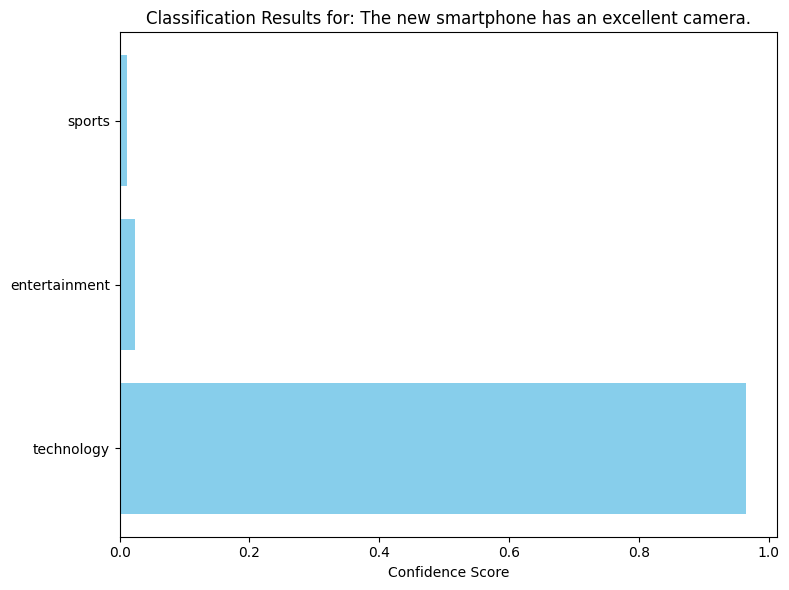

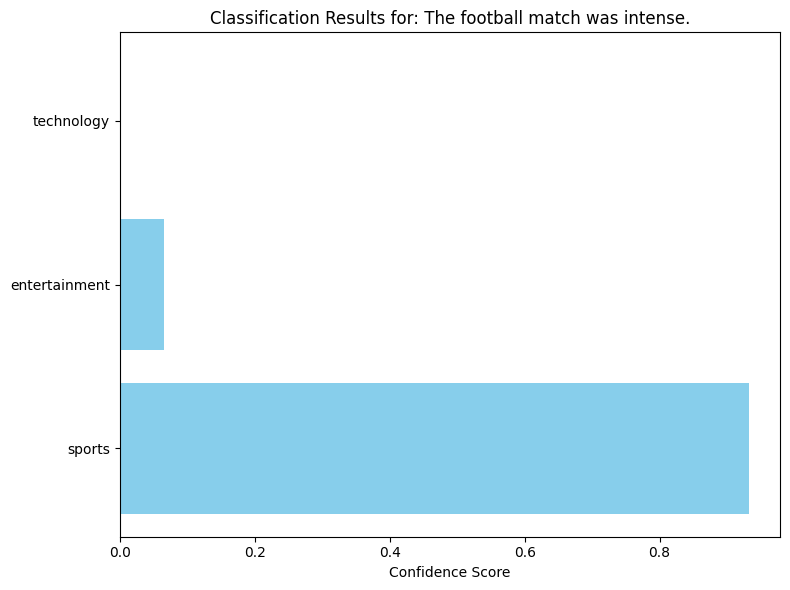

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Example results (replace with actual results)
texts = [
    "The new smartphone has an excellent camera.",
    "The football match was intense."
]

labels = [
    ['technology', 'entertainment', 'sports'],
    ['sports', 'entertainment', 'technology']
]

scores = [
    [0.9649, 0.0233, 0.0118],
    [0.9318, 0.0659, 0.0023]
]

# Plotting bar charts for each text result
def plot_result(text, labels, scores):
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.barh(labels, scores, color='skyblue')
    ax.set_xlabel('Confidence Score')
    ax.set_title(f"Classification Results for: {text}")
    plt.tight_layout()
    plt.savefig(f"{text[:10]}_classification_result.png")  # Save as PNG
    plt.show()

# Plot and save results for each text
for text, label, score in zip(texts, labels, scores):
    plot_result(text, label, score)


                                          Text Predicted Label 1  Score 1  \
0  The new smartphone has an excellent camera.        technology   0.9649   
1              The football match was intense.            sports   0.9318   

  Predicted Label 2  Score 2 Predicted Label 3  Score 3  
0     entertainment   0.0233            sports   0.0118  
1     entertainment   0.0659        technology   0.0023  


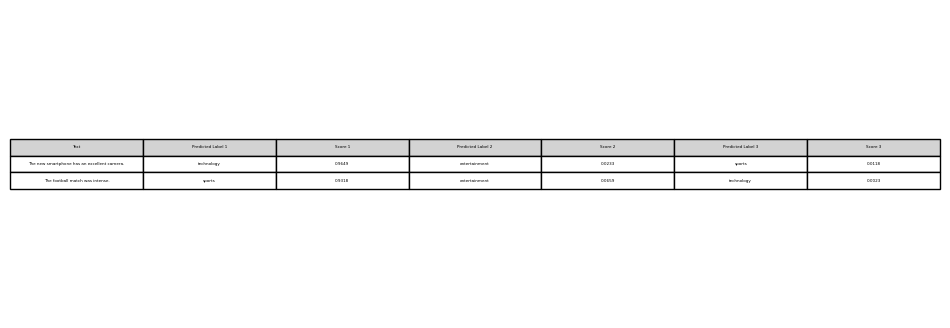

In [16]:
# Create a DataFrame for the results
df = pd.DataFrame({
    'Text': texts,
    'Predicted Label 1': [label[0] for label in labels],
    'Score 1': [score[0] for score in scores],
    'Predicted Label 2': [label[1] for label in labels],
    'Score 2': [score[1] for score in scores],
    'Predicted Label 3': [label[2] for label in labels],
    'Score 3': [score[2] for score in scores]
})

# Display the table
print(df)

# Save the table to CSV (if needed)
df.to_csv('classification_results.csv', index=False)

# Optionally, display the table as an image using matplotlib (PNG)
fig, ax = plt.subplots(figsize=(12, 4))  # Adjust figure size as needed
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='center', colColours=['lightgray']*df.shape[1])
plt.savefig('classification_results_table.png', bbox_inches='tight')
plt.show()


In [17]:
# Filter for best results where score > 0.9
best_results = []
for text, label, score in zip(texts, labels, scores):
    if max(score) > 0.9:  # Adjust threshold as needed
        best_results.append((text, label, score))

# Convert best results into a DataFrame for clean presentation
best_results_df = pd.DataFrame(best_results, columns=['Text', 'Predicted Labels', 'Scores'])

# Display best results
print(best_results_df)

# Save to CSV or image if required
best_results_df.to_csv('best_classification_results.csv', index=False)


                                          Text  \
0  The new smartphone has an excellent camera.   
1              The football match was intense.   

                      Predicted Labels                    Scores  
0  [technology, entertainment, sports]  [0.9649, 0.0233, 0.0118]  
1  [sports, entertainment, technology]  [0.9318, 0.0659, 0.0023]  
